In [ ]:
from scipy.io import arff
import urllib.request
import io

url = "http://www.ece.uah.edu/~thm0009/icsdatasets/gas_final.arff"
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df['result'] = df['result'].apply(lambda x: int(x.decode('utf-8')))
df

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,'H','L',LL,control_mode,control_scheme,pump,crc_rate,measurement,time,result
0,7.0,7.0,183.0,233.0,9.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,1.0,14.894827,1.13,0
1,7.0,7.0,183.0,233.0,9.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,1.0,16.259237,1.25,0
2,7.0,7.0,183.0,233.0,9.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,1.0,17.254122,1.04,0
3,7.0,7.0,183.0,233.0,9.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,1.0,17.936329,1.07,0
4,7.0,7.0,183.0,233.0,9.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,1.0,18.703810,1.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236174,7.0,7.0,183.0,233.0,10.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,0.0,89.198410,1.30,0
236175,7.0,7.0,183.0,233.0,10.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,0.0,89.567932,1.20,0
236176,7.0,7.0,183.0,233.0,10.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,0.0,88.317230,1.05,0
236177,7.0,7.0,183.0,233.0,10.0,10.0,3.0,10.0,3.0,10.0,...,80.0,20.0,10.0,2.0,1.0,0.0,0.0,88.374077,1.07,0


In [ ]:
# Count the number of samples for each class
class_counts = df['result'].value_counts()

# Display the counts
print(class_counts)

0    172415
7     34002
2     12460
1      9187
4      3725
3      1833
5      1320
6      1237
Name: result, dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC

import time


In [ ]:
X = df.drop(columns=['result'])
y = df['result']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
target = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [ ]:
#XgBoost
start_time = time.perf_counter()
model = xgb.XGBClassifier(objective='multi:softmax', num_class=8, random_state=42)
model.fit(xtrain, ytrain)
end_time = time.perf_counter()
y_pred = model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(ytest, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(ytest, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9668
Precison: 0.9746
Recall: 0.9668
Computation time: 19.420530602000014 seconds


In [ ]:
from sklearn.multioutput import MultiOutputClassifier

multioutput_classifier = OneVsRestClassifier(model)

# Fit the multioutput_classifier on the training data
multioutput_classifier.fit(X_train, y_train)

# Now you can use the predict_proba method
prob_test_vec = multioutput_classifier.predict_proba(X_test)

print(prob_test_vec)

[[9.9999177e-01 2.0814568e-06 4.7936524e-06 ... 1.2058266e-06
  2.8476040e-07 1.0932862e-06]
 [1.4681895e-05 1.2694408e-06 2.3082632e-06 ... 1.2058266e-06
  2.8476040e-07 9.9998736e-01]
 [9.9999285e-01 1.1284195e-06 9.5013269e-07 ... 1.2058266e-06
  2.3979047e-07 1.0932862e-06]
 ...
 [9.9509996e-01 1.2830113e-05 3.6012745e-03 ... 1.6460743e-06
  1.6716574e-07 7.2626028e-07]
 [9.9375445e-01 7.6770943e-05 3.5065501e-03 ... 1.6460743e-06
  3.4972817e-07 6.6449536e-07]
 [1.4681895e-05 1.2694408e-06 2.3082632e-06 ... 1.2058266e-06
  2.8476040e-07 9.9998736e-01]]


In [ ]:
from sklearn.metrics import precision_score, recall_score

n_classes = 8
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * 8
precision_scores = [0] * n_classes
recall_scores = [0] * n_classes

for i in range(8):
  fpr[i], tpr[i], thresholds1 = roc_curve(y_test[:, i], prob_test_vec[:, i])
  fpr.append(fpr[i])
  auc_score[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  y_true = y_test[:, i]
  y_pred = (prob_test_vec[:, i] >= 0.5).astype(int)  # Assuming a threshold of 0.5
  precision_scores[i] = precision_score(y_true, y_pred)
  recall_scores[i] = recall_score(y_true, y_pred)

# Calculate micro-average ROC curve
fprm1 = np.unique(np.concatenate([x for x in fpr]))
tprm1 = np.zeros_like(fprm1)

for i in range(y_test.shape[1]):
  tprm1 += np.interp(fprm1, fpr[i], tpr[i])

tprm1 /= y_test.shape[1]

# Calculate micro-average AUC
roc_auc_m1 = auc(fprm1, tprm1)

print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("Accuracy Scores:", auc_score)
print("AUC SCORE:", roc_auc_m1)

Precision Scores: [0.9936949797763502, 0.9585129310344828, 0.641409691629956, 0.9701492537313433, 0.9921156373193167, 1.0, 0.996031746031746, 1.0]
Recall Scores: [0.9626321703304619, 0.9616216216216216, 0.9126619306310071, 0.9701492537313433, 0.9817945383615084, 1.0, 1.0, 1.0]
Accuracy Scores: [0.9944593940248474, 0.9986079884140959, 0.9810971927046137, 0.9974162152288386, 0.9989924894054181, 1.0, 0.9999991520562423, 1.0]
AUC SCORE: 0.9963229442190427


In [ ]:
#Decision Tree
start_time = time.perf_counter()
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end_time = time.perf_counter()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9867
Precison: 0.9893
Recall: 0.9867
Computation time: 1.5641812149999623 seconds


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score, recall_score

multioutput_classifier = OneVsRestClassifier(model)

# Fit the multioutput_classifier on the training data
multioutput_classifier.fit(X_train, y_train)

# Now you can use the predict_proba method
prob_test_vec = multioutput_classifier.predict_proba(X_test)

# print(prob_test_vec)


n_classes = 8
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * 8
precision_scores = [0] * n_classes
recall_scores = [0] * n_classes

for i in range(8):
  fpr[i], tpr[i], thresholds1 = roc_curve(y_test[:, i], prob_test_vec[:, i])
  fpr.append(fpr[i])
  auc_score[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  y_true = y_test[:, i]
  y_pred = (prob_test_vec[:, i] >= 0.5).astype(int)  # Assuming a threshold of 0.5
  precision_scores[i] = precision_score(y_true, y_pred)
  recall_scores[i] = recall_score(y_true, y_pred)

# Calculate micro-average ROC curve
fprm2 = np.unique(np.concatenate([x for x in fpr]))
tprm2 = np.zeros_like(fprm2)

for i in range(y_test.shape[1]):
  tprm2 += np.interp(fprm2, fpr[i], tpr[i])

tprm2 /= y_test.shape[1]

# Calculate micro-average AUC
roc_auc_m2 = auc(fprm2, tprm2)

print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("Accuracy Scores:", auc_score)
print("AUC SCORE:", roc_auc_m2)

Precision Scores: [0.9958607114944857, 0.9707158351409978, 0.8515185601799775, 0.9088319088319088, 0.9765319426336375, 1.0, 0.9960159362549801, 1.0]
Recall Scores: [0.9912126537785588, 0.9675675675675676, 0.9490179690764731, 0.9522388059701492, 0.9739921976592978, 1.0, 0.9960159362549801, 1.0]
Accuracy Scores: [0.9923429766937504, 0.9853598978611097, 0.970736916285326, 0.9758284121491856, 0.9874680978765835, 1.0, 0.9979973264333323, 1.0]
AUC SCORE: 0.9887168559537078


In [ ]:
#Random Forest
start_time = time.perf_counter()
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9859
Precison: 0.9872
Recall: 0.9859
Computation time: 64.68336717399995 seconds


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score, recall_score

multioutput_classifier = OneVsRestClassifier(model)
multioutput_classifier.fit(X_train, y_train)
prob_test_vec = multioutput_classifier.predict_proba(X_test)


n_classes = 8
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * 8
precision_scores = [0] * n_classes
recall_scores = [0] * n_classes

for i in range(8):
  fpr[i], tpr[i], thresholds1 = roc_curve(y_test[:, i], prob_test_vec[:, i])
  fpr.append(fpr[i])
  auc_score[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  y_true = y_test[:, i]
  y_pred = (prob_test_vec[:, i] >= 0.5).astype(int)  # Assuming a threshold of 0.5
  precision_scores[i] = precision_score(y_true, y_pred)
  recall_scores[i] = recall_score(y_true, y_pred)

# Calculate micro-average ROC curve
fprm3 = np.unique(np.concatenate([x for x in fpr]))
tprm3 = np.zeros_like(fprm3)

for i in range(y_test.shape[1]):
  tprm3 += np.interp(fprm3, fpr[i], tpr[i])

tprm3 /= y_test.shape[1]

# Calculate micro-average AUC
roc_auc_m3 = auc(fprm3, tprm3)

print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("Accuracy Scores:", auc_score)

Precision Scores: [0.9958426606971538, 0.9830043859649122, 0.8293040293040294, 0.9671641791044776, 0.9882198952879581, 1.0, 0.9960159362549801, 1.0]
Recall Scores: [0.9868910080958829, 0.9691891891891892, 0.9460927705808608, 0.9671641791044776, 0.9817945383615084, 1.0, 0.9960159362549801, 1.0]
Accuracy Scores: [0.9942511463837611, 0.9906363255248374, 0.9748566757481101, 0.9893890815426714, 0.9953836668572182, 1.0, 0.9999921565202424, 1.0]


In [ ]:
print("AUC SCORE:", roc_auc_m3)

AUC SCORE: 0.9930654900790811


In [ ]:
#Bagging Classifier
start_time = time.perf_counter()
model = BaggingClassifier(random_state=42)
model.fit(xtrain, ytrain)
end_time = time.perf_counter()
y_pred = model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(ytest, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(ytest, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9895
Precison: 0.9899
Recall: 0.9895
Computation time: 6.272770871000148 seconds


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score, recall_score

multioutput_classifier = OneVsRestClassifier(model)
multioutput_classifier.fit(X_train, y_train)
prob_test_vec = multioutput_classifier.predict_proba(X_test)

print(prob_test_vec)

n_classes = 8
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * 8
precision_scores = [0] * n_classes
recall_scores = [0] * n_classes

for i in range(8):
  fpr[i], tpr[i], thresholds1 = roc_curve(y_test[:, i], prob_test_vec[:, i])
  fpr.append(fpr[i])
  auc_score[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  y_true = y_test[:, i]
  y_pred = (prob_test_vec[:, i] >= 0.5).astype(int)  # Assuming a threshold of 0.5
  precision_scores[i] = precision_score(y_true, y_pred)
  recall_scores[i] = recall_score(y_true, y_pred)

# Calculate micro-average ROC curve
fprm4 = np.unique(np.concatenate([x for x in fpr]))
tprm4 = np.zeros_like(fprm4)

for i in range(y_test.shape[1]):
  tprm4 += np.interp(fprm4, fpr[i], tpr[i])

tprm4 /= y_test.shape[1]

# Calculate micro-average AUC
roc_auc_m4 = auc(fprm4, tprm4)

print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("Accuracy Scores:", auc_score)
print("AUC SCORE:", roc_auc_m4)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]
Precision Scores: [0.7347997290202388, 0.03916504361080532, 0.05066051316792277, 0.007092048437632314, 0.016279955965788805, 0.005165551697857566, 0.005313743754763316, 0.1415234143449911]
Recall Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy Scores: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
AUC SCORE: 0.5


In [ ]:
from sklearn.linear_model import LogisticRegression

start_time = time.perf_counter()
model = LogisticRegression(max_iter = 100000)
model.fit(xtrain, ytrain)
end_time = time.perf_counter()
y_pred = model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(ytest, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(ytest, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.7348
Precison: 0.5399
Recall: 0.7348
Computation time: 1.8786184389998652 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score, recall_score

multioutput_classifier = OneVsRestClassifier(model)
multioutput_classifier.fit(X_train, y_train)
prob_test_vec = multioutput_classifier.predict_proba(X_test)

print(prob_test_vec)

n_classes = 8
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * 8
precision_scores = [0] * n_classes
recall_scores = [0] * n_classes

for i in range(8):
  fpr[i], tpr[i], thresholds1 = roc_curve(y_test[:, i], prob_test_vec[:, i])
  fpr.append(fpr[i])
  auc_score[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  y_true = y_test[:, i]
  y_pred = (prob_test_vec[:, i] >= 0.0).astype(int)  # Assuming a threshold of 0.5
  precision_scores[i] = precision_score(y_true, y_pred)
  recall_scores[i] = recall_score(y_true, y_pred)

# Calculate micro-average ROC curve
fprm5 = np.unique(np.concatenate([x for x in fpr]))
tprm5 = np.zeros_like(fprm5)

for i in range(y_test.shape[1]):
  tprm5 += np.interp(fprm5, fpr[i], tpr[i])

tprm5 /= y_test.shape[1]

# Calculate micro-average AUC
roc_auc_m5 = auc(fprm5, tprm5)

print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("Accuracy Scores:", auc_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]
Precision Scores: [0.7347997290202388, 0.03916504361080532, 0.05066051316792277, 0.007092048437632314, 0.016279955965788805, 0.005165551697857566, 0.005313743754763316, 0.1415234143449911]
Recall Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy Scores: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.perf_counter()
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = KNN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9790
Precison: 0.9822
Recall: 0.9790
Computation time: 0.12195504700002857 seconds


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score, recall_score

multioutput_classifier = OneVsRestClassifier(model)
multioutput_classifier.fit(X_train, y_train)
prob_test_vec = multioutput_classifier.predict_proba(X_test)

print(prob_test_vec)

n_classes = 8
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * 8
precision_scores = [0] * n_classes
recall_scores = [0] * n_classes

for i in range(8):
  fpr[i], tpr[i], thresholds1 = roc_curve(y_test[:, i], prob_test_vec[:, i])
  fpr.append(fpr[i])
  auc_score[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  y_true = y_test[:, i]
  y_pred = (prob_test_vec[:, i] >= 0.1).astype(int)  # Assuming a threshold of 0.5
  precision_scores[i] = precision_score(y_true, y_pred)
  recall_scores[i] = recall_score(y_true, y_pred)

# Calculate micro-average ROC curve
fprm6 = np.unique(np.concatenate([x for x in fpr]))
tprm6 = np.zeros_like(fprm6)

for i in range(y_test.shape[1]):
  tprm6 += np.interp(fprm6, fpr[i], tpr[i])

tprm6 /= y_test.shape[1]

# Calculate micro-average AUC
roc_auc_m6 = auc(fprm6, tprm6)

print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("Accuracy Scores:", auc_score)
print("AUC SCORE:", roc_auc_m6)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]
Precision Scores: [0.7347997290202388, 0.03916504361080532, 0.05066051316792277, 0.007092048437632314, 0.016279955965788805, 0.005165551697857566, 0.005313743754763316, 0.1415234143449911]
Recall Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy Scores: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
AUC SCORE: 0.5


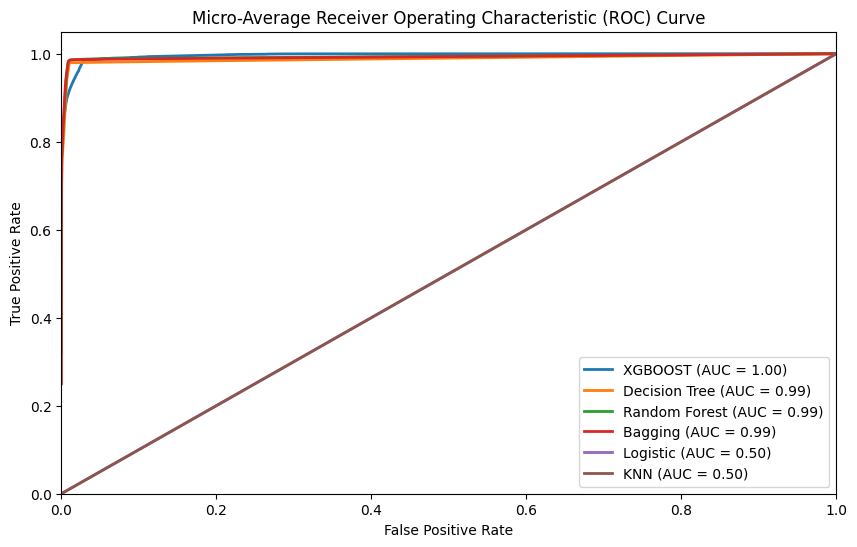

In [ ]:
# Plot micro-average ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fprm1, tprm1, lw=2, label=f'XGBOOST (AUC = {roc_auc_m1:.2f})')
plt.plot(fprm2, tprm2, lw=2, label=f'Decision Tree (AUC = {roc_auc_m2:.2f})')
plt.plot(fprm3, tprm3, lw=2, label=f'Random Forest (AUC = {roc_auc_m3:.2f})')
plt.plot(fprm4, tprm4, lw=2, label=f'Bagging (AUC = {roc_auc_m4:.2f})')
plt.plot(fprm5, tprm5, lw=2, label=f'Logistic (AUC = {roc_auc_m5:.2f})')
plt.plot(fprm6, tprm6, lw=2, label=f'KNN (AUC = {roc_auc_m6:.2f})')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


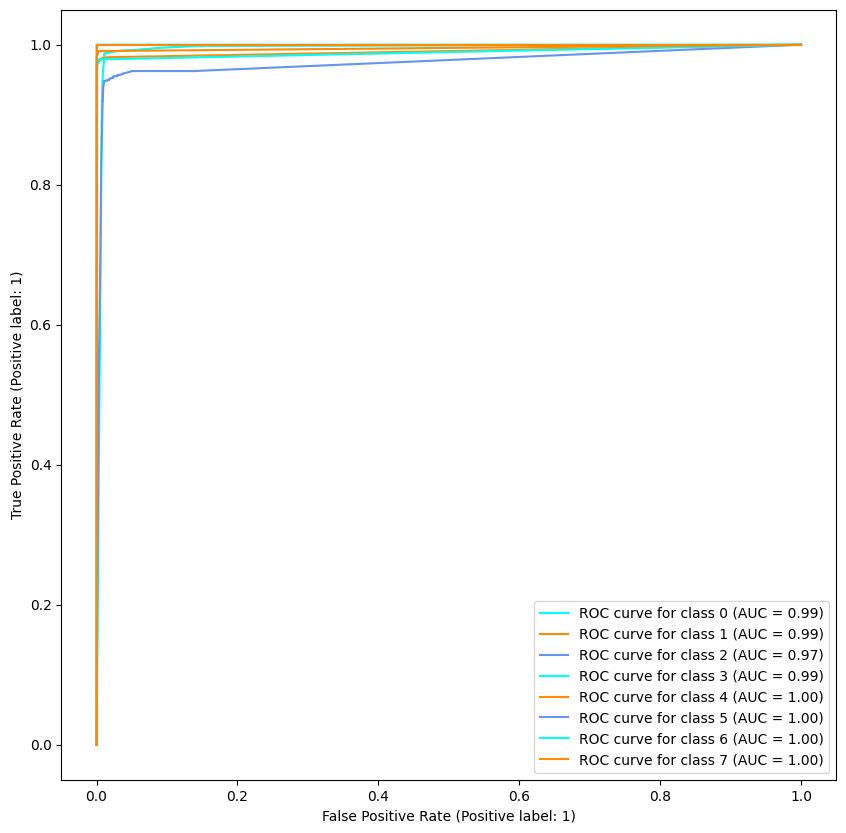

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from itertools import cycle
fig, ax = plt.subplots(figsize=(10, 10))
target_names = target
print(target)
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
  RocCurveDisplay.from_predictions(
    y_test[:, i],
    prob_test_vec[:, i],
    name=f"ROC curve for class {i}",
    color=color,
    ax=ax
  )

In [ ]:
#SVMLinear
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
#SVM Polynomial
model = SVC(kernel='poly', random_state=42)
model.fit(xtrain, ytrain)


KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(ytest, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(ytest, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(ytest, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

In [ ]:
#SVM Radial
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7348


In [ ]:
#XgBoost
# model = BaggingClassifier(random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from scipy.optimize import minimize

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the DBN architecture
dbn = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=100)

# Train the DBN on the training data
dbn.fit(X_train, y_train)

# Extract features from the trained DBN
train_features = dbn.transform(X_train)
test_features = dbn.transform(X_test)

# Define the optimization function
def population_estimate(params, features, target):
    estimated_population = np.dot(features, params)
    return mean_squared_error(target, estimated_population)

# Initial guess for optimization parameters
initial_params = np.random.rand(train_features.shape[1])

# Optimize the parameters using minimize function from scipy
optimized_params = minimize(
    population_estimate,
    initial_params,
    args=(train_features, y_train),
    method='Nelder-Mead'
).x

# Test the optimized parameters on the test data
estimated_population_test = np.dot(test_features, optimized_params)
test_mse = mean_squared_error(y_test, estimated_population_test)

print(f"Optimized Parameters: {optimized_params}")
print(f"Test MSE: {test_mse}")


Optimized Parameters: [ 1.34789422e+02 -2.91347550e+01 -3.46758052e+01  1.60240629e+02
 -7.08594085e+01 -2.14863233e+02  3.80840644e+02  3.72203923e+00
 -3.85317268e+02  1.73940116e-03]
Test MSE: 16232.100966398186


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LinearRegression

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the DBN architecture
dbn = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=100)

# Train the DBN on the training data
dbn.fit(X_train_scaled)

# Extract features from the trained DBN
train_features = dbn.transform(X_train_scaled)
test_features = dbn.transform(X_test_scaled)

# Train a linear regression model on the extracted features
regressor = LinearRegression()
regressor.fit(train_features, y_train)

# Predict using the trained regressor
predictions = regressor.predict(test_features)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")

NameError: ignored

In [ ]:
import os

# Install the peo module
os.system('pip install git+https://github.com/facebookresearch/peo.git')

# Install the dbn module
os.system('pip install dbn')

256

In [ ]:
class DBN:
    def __init__(self, params):
        self.params = params

        # Initialize the RBMs
        self.rbms = []
        for i in range(len(self.params) - 1):
            self.rbms.append(RBM(self.params[i], self.params[i + 1]))

    def fit(self, x_train, y_train):
        # Pretrain the RBMs layer-wise
        for i in range(len(self.rbms)):
            self.rbms[i].fit(x_train)

        # Fine-tune the DBN
        self.rbms[-1].fit(x_train, y_train)

    def evaluate(self, x_test, y_test):
        # Evaluate the accuracy of the DBN on the test data
        y_pred = self.predict(x_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy

    def predict(self, x):
        # Predict the labels for the given data
        for rbm in self.rbms:
            x = rbm.predict(x)
        return x

In [ ]:
class RBM:
    def __init__(self, n_visible, n_hidden):
        self.n_visible = n_visible
        self.n_hidden = n_hidden

        # Initialize the weights and biases
        self.weights = np.random.rand(n_visible, n_hidden)
        self.visible_biases = np.random.rand(n_visible)
        self.hidden_biases = np.random.rand(n_hidden)
    def sigmoid(x):
      return 1 / (1 + np.exp(-x))

    def fit(self, x):
      # Train the RBM using contrastive divergence
      for _ in range(10):
          # Sample from the visible layer
          visible_states = x

          # Sample from the hidden layer
          hidden_states = self.sample_hidden_states(visible_states)

          # Sample from the visible layer given the hidden layer
          visible_states_prime = self.sample_visible_states(hidden_states)

          # Update the weights and biases
          self.weights += (visible_states.T @ hidden_states - visible_states_prime.T @ hidden_states) / len(x)
          self.visible_biases += np.mean(visible_states - visible_states_prime, axis=0)
          self.hidden_biases += np.mean(hidden_states - visible_states_prime.T, axis=0)

    def sample_visible_states(self, hidden_states):
      # Sample from the visible layer given the hidden layer
      p_v_given_h = self.sigmoid(self.weights @ hidden_states + self.visible_biases)
      visible_states = np.floor(p_v_given_h)
      return visible_states

    def sample_hidden_states(self, visible_states):
        # Sample from the hidden layer given the visible layer
        p_h_given_v = self.sigmoid(self.weights.T @ visible_states + self.hidden_biases)
        hidden_states = np.random.binomial(1, p_h_given_v)
        return hidden_states




In [ ]:
# Define the PEO algorithm
class PEO:
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.population_size = 100
        self.max_iters = 100
        self.mutation_rate = 0.01

    def run(self):
        # Initialize the population
        population = self.generate_population()

        # Evaluate the fitness of each individual in the population
        fitness = self.evaluate_fitness(population)

        # Iterate until the stopping criteria are met
        for i in range(self.max_iters):
            # Select the best individuals from the population
            best_individuals = self.select_best_individuals(population, fitness)

            # Crossover the best individuals to create new individuals
            new_population = self.crossover(best_individuals)

            # Mutate the new individuals
            new_population = self.mutate(new_population)

            # Evaluate the fitness of the new individuals
            fitness = self.evaluate_fitness(new_population)

            # Replace the old population with the new population
            population = new_population

        # Get the best individual in the population
        best_individual = self.get_best_individual(population)

        # Return the parameters of the best individual
        return best_individual

    def generate_population(self):
        # Generate a random population of parameters
        population = []
        for i in range(self.population_size):
            population.append(np.random.rand(3))
        return population

    def evaluate_fitness(self, population):
        # Evaluate the fitness of each individual in the population
        fitness = []
        for individual in population:
            # Train the DBN with the given parameters
            dbn = DBN(individual)
            dbn.fit(self.x_train, self.y_train)

            # Evaluate the accuracy of the DBN on the test data
            accuracy = dbn.evaluate(self.x_test, self.y_test)

            # Add the accuracy to the fitness list
            fitness.append(accuracy)
        return fitness

    def select_best_individuals(self, population, fitness):
        # Select the best individuals from the population based on their fitness
        best_individuals = []
        for i in range(self.population_size // 2):
            best_individuals.append(population[fitness.index(max(fitness))])
        return best_individuals

    def crossover(self, best_individuals):
        # Crossover the best individuals to create new individuals
        new_population = []
        for i in range(self.population_size // 2):
            # Select two best individuals randomly
            a, b = np.random.choice(best_individuals, 2, replace=False)

            # Crossover the two individuals
            new_individual = np.concatenate((a[:len(a) // 2], b[len(b) // 2:]))

            # Add the new individual to the new population
            new_population.append(new_individual)
        return new_population

    def mutate(self, population):
        # Mutate the new individuals
        for i in range(len(population)):
            # Randomly select a gene to mutate
            gene_index = np.random.randint(0, len(population[0]))

            # Mutate the gene
            population[i][gene_index] += np.random.rand() * 2 * self.mutation_rate - self.mutation_rate
        return population

    def get_best_individual(self, population):
        # Get the best individual in the population
        return population[fitness.index(max(fitness))]

In [ ]:
peo = PEO(X_train, y_train)

# Run the PEO algorithm
peo.run()

# Get the optimal parameters for the DBN
params = peo.get_best_params()

# Train the DBN
dbn = DBN(params)
dbn.fit(X_train, y_train)

# Classify the test data
y_pred = dbn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

TypeError: ignored